<a href="https://colab.research.google.com/github/xxchanjotxx/Page-views-Analysis/blob/main/Page_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import calendar
from scipy.stats import linregress



%matplotlib inline

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = "date", parse_dates = True)
#1304
df.head(10)


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


In [3]:
# Clean the data by filtering out days when the
#  page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df.drop((df[df["value"] < df["value"].quantile(0.025)]).index | (df[df["value"] > df["value"].quantile(0.975)]).index, inplace = True)


<ipython-input-3-89ad2e55a62c>:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df.drop((df[df["value"] < df["value"].quantile(0.025)]).index | (df[df["value"] > df["value"].quantile(0.975)]).index, inplace = True)


In [4]:
df.shape[0]

1238

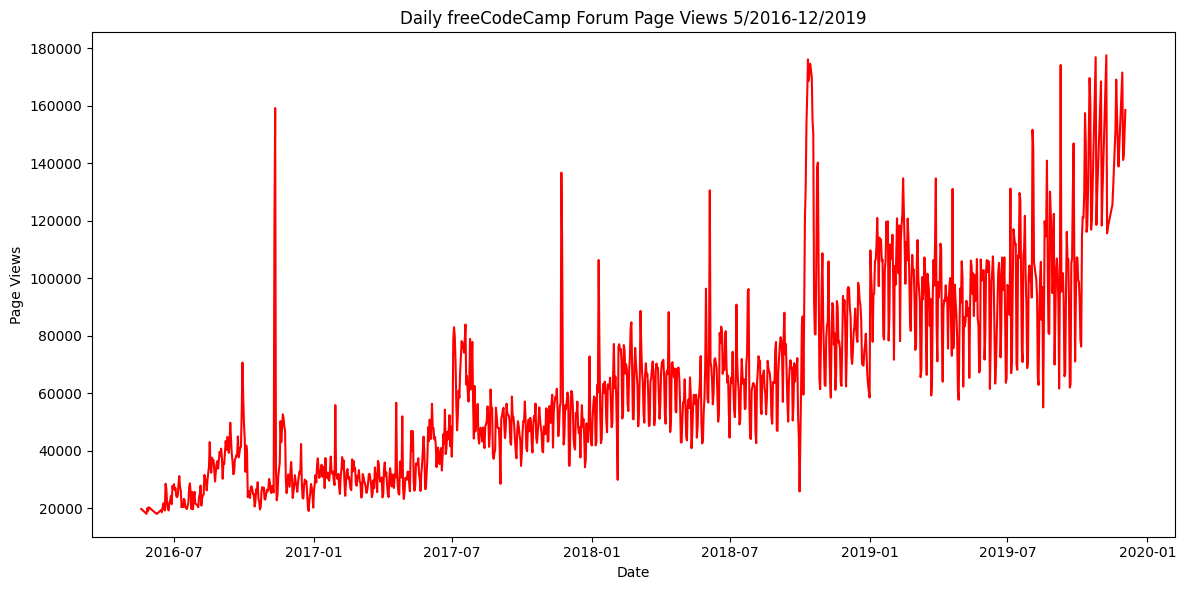

In [5]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(df.index, df["value"], color = "r")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.tight_layout()

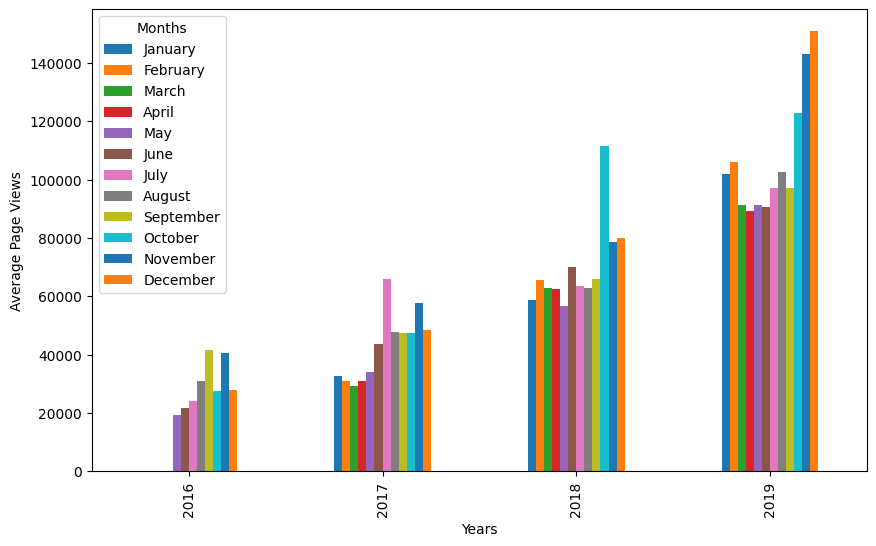

In [6]:
df["year"] = df.index.year
df["month"] = df.index.month
df["month_name"] = df["month"].apply(lambda x: calendar.month_name[x])
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(["year", "month"])["value"].mean().unstack().plot(kind="bar", ax=ax, xlabel="Years", ylabel = "Average Page Views")
legend_labels = [calendar.month_name[i] for i in range(1, 13)]
ax.legend(legend_labels, title='Months')



Text(0, 0.5, 'Page Views')

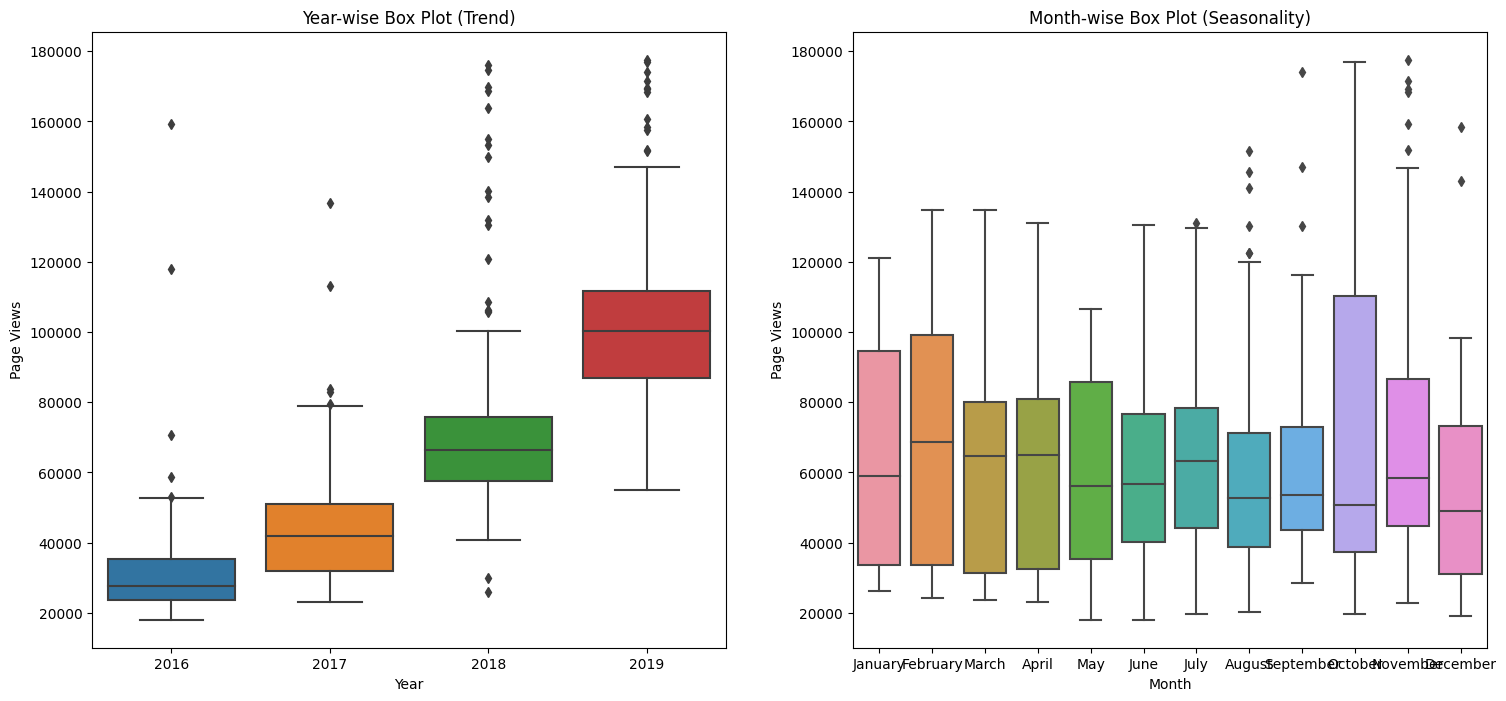

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18,8))

sns.boxplot(x = "year", y= "value", data = df, ax = ax1)
sns.boxplot(x = "month_name", y= "value", data = df, ax = ax2, order = calendar.month_name[1:])
ax1.set_title("Year-wise Box Plot (Trend)")
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

